Infectious diseases such as H1N1,SARS and most recent;y the covid-19 virus continue to pose a global threat. Currently the world is witnessing a coronavirus pandemic that has affected almost every country on the planet.
will perform exploratory data analysis on a cornavirus dataset

In [1]:
#importing libraries 
#The requests library allows sending HTTP requests through Python,which will be used to obtain the dataset from the internet
#pandas is a open-source Python library that provides powerful data structures and data analysis tool to deal with datasets.
#matplotlib.pyplot and seaborn is packages for Python are the most popular and used packages for data visulaization through Python
import pandas as pd
import requests
import matplotlib.pyplot
import seaborn as sns

getting data from ourworldindata.org using requests

In [2]:
filename='covid-data.csv'
data_url='https://covid.ourworldindata.org/data/owid-covid-data.csv'
dataset=requests.get(data_url).content
df=open(filename,'wb')
df.write(dataset)
df.close()

Thus loading a dataset into pandas dataframe object 

In [11]:
df1=pd.read_csv(filename)
print(df1.columns)
print(df1.describe())
print(df1.shape)


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')
        total_cases      new_cases   total_deaths    new_deaths  \
count  2.224200e+04   22242.000000   22242.000000  22242.000000   
mean   2.241091e+04     603.003507    1451.169229     35.492582   
std    2.281304e+05    5337.678932   14911.679802    331.998436   
min 

therefore, there are various attributes that are present in the dataframe .The data has 22242 rows and 33 columns so far now..

# Preprocessing

In [10]:
#lets us check for missing values in the dataset
print(df1.isnull().sum())


iso_code                              64
continent                            223
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              391
new_cases_per_million                391
total_deaths_per_million             391
new_deaths_per_million               391
total_tests                        16351
new_tests                          16982
total_tests_per_thousand           16351
new_tests_per_thousand             16982
new_tests_smoothed                 15753
new_tests_smoothed_per_thousand    15753
tests_units                        15155
stringency_index                    4510
population                            64
population_density                   923
median_age                          2055
aged_65_older                       2331
aged_70_older   

In [12]:
#
print(df1.dtypes)

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                          int64
new_cases                            int64
total_deaths                         int64
new_deaths                           int64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Replacing the null values as 0

In [15]:
print(df1.fillna(0,inplace=True))
print(df1.isnull().sum())

None
iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
total_tests                        0
new_tests                          0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                  

Let us visualize the situation in the top ten countries with the most number of cases of covid-19

In [22]:
totalcases=df1.groupby('location')['new_cases'].sum()
totalcases=totalcases.sort_values(ascending=False)
print(totalcases)

location
World                              6706002
United States                      1897838
Brazil                              614941
Russia                              449834
United Kingdom                      283311
                                    ...   
British Virgin Islands                   8
Bonaire Sint Eustatius and Saba          7
Lesotho                                  4
Anguilla                                 3
Hong Kong                                0
Name: new_cases, Length: 212, dtype: int64


top most affected countries

In [21]:
most_affected_countries=totalcases[1:11].index
print(most_affected_countries)

Index(['United States', 'Brazil', 'Russia', 'United Kingdom', 'Spain', 'India',
       'Italy', 'Peru', 'Germany', 'Turkey'],
      dtype='object', name='location')


In [25]:
#no of cases in top 10 countries
cases=totalcases[1:11].values   
totaldeaths=df1.groupby('location')['new_deaths'].sum()
print(totaldeaths)
#no of deaths in top 10 countries
deaths=totaldeaths[most_affected_countries].values
print(deaths)



location
Afghanistan          309
Albania               33
Algeria              690
Andorra               51
Angola                 4
                   ...  
Western Sahara         1
World             394713
Yemen                111
Zambia                 7
Zimbabwe               4
Name: new_deaths, Length: 212, dtype: int64
[109143  34021   5528  40261  27134   6642  33774   5162   8646   4648]


In [26]:
death_cases_df=pd.DataFrame({'Country':most_affected_countries,'Total Case':cases,'Total Deaths':deaths})
print(death_cases_df)

          Country  Total Case  Total Deaths
0   United States     1897838        109143
1          Brazil      614941         34021
2          Russia      449834          5528
3  United Kingdom      283311         40261
4           Spain      240978         27134
5           India      236657          6642
6           Italy      234531         33774
7            Peru      187400          5162
8         Germany      183678          8646
9          Turkey      168340          4648


# EDA

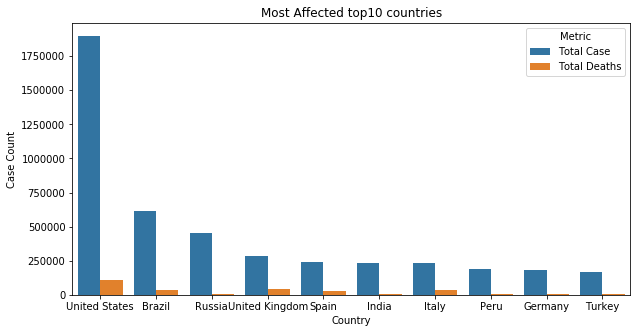

In [34]:
import matplotlib.pyplot as plt
dataplot=pd.melt(death_cases_df,id_vars=['Country'],value_vars=['Total Case','Total Deaths'],var_name='Metric',value_name='Case Count')
plt.figure(figsize=(10,5))
sns.barplot(x="Country",hue="Metric",y="Case Count",data=dataplot)
plt.title('Most Affected top10 countries')
plt.show()

Through the above visualization it is evident that the United States is by far the most affected country with over a million
total cases...while Russia has the third highest number of cases,and also has a lower death count when compare to United kingdom and spain..

# Countrywise-Testing rate 

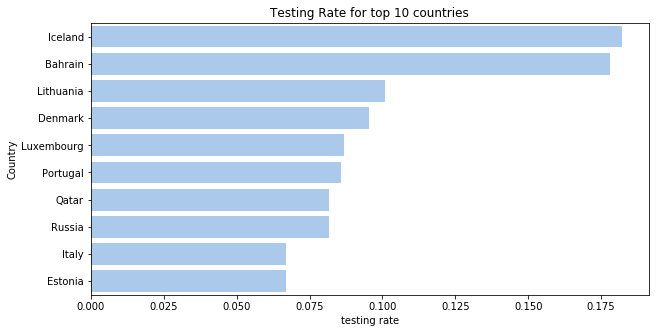

In [35]:
total_test=df1.groupby('location')['new_tests'].sum().values
#print(total_test)

population=df1.groupby('location')['population'].nth(-1)
#print(population)

testing_rate=(total_test/population).sort_values(ascending=False)[:10]
#print(testing_rate)
plt.figure(figsize=(10,5))
sns.set_color_codes("pastel")
sns.barplot(y=testing_rate.index,x=testing_rate.values,orient="h",color="b")
plt.title('Testing Rate for top 10 countries')
plt.xlabel('testing rate')
plt.ylabel('Country')
plt.show()


iceland is the country ,testing most with more tha 0.17% of the population tested

           date  total_cases_x  total_cases_y
0    2019-12-31              0              0
1    2020-01-01              0              0
2    2020-01-02              0              0
3    2020-01-03              0              0
4    2020-01-04              0              0
..          ...            ...            ...
153  2020-06-02         198706         233197
154  2020-06-03         207615         233515
155  2020-06-04         216919         233836
156  2020-06-05         226770         234013
157  2020-06-06         236657         234531

[158 rows x 3 columns]


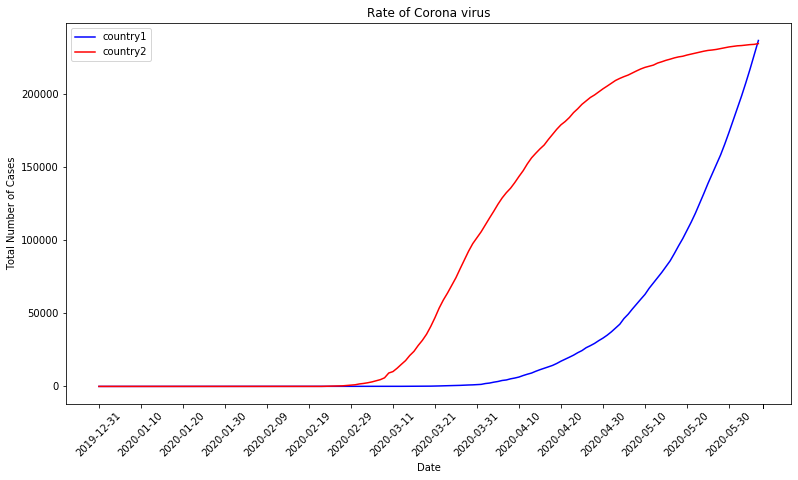

In [36]:
#rate of increase of coronavirus disease
country1='India'
country1data=df1.loc[df1['location']==country1]
country1cases=country1data[['date','total_cases']]

country2='Italy'
country2data=df1.loc[df1['location']==country2]
country2cases=country2data[['date','total_cases']]

date_wise_cases=country1cases.merge(country2cases,how='inner',on='date')
print(date_wise_cases)
plt.figure(figsize=(13,7))
plt.plot(date_wise_cases['date'].values,date_wise_cases['total_cases_x'].values,color='blue',label='country1')
plt.plot(date_wise_cases['date'].values,date_wise_cases['total_cases_y'].values,color='red',label='country2')
plt.xticks([date_wise_cases['date'][i] if i%10==0 else '' for i in range (len(date_wise_cases.index))],rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.title('Rate of Corona virus')
plt.legend()
plt.show()


 calculating the degree of correlation between features and total no of cases to see if there is any correlation effect.
A degree of correlation indicates how a change in one variable affects another variable and can be postive or negative .
if the features are population density,median age,diabetes prevalence,stringency index,cardiovascular death rates and population aged 70 or older of a country ,have any correlation to the total number of cases in the country

The features for the respective countries are extracted using the groupby function and nth or mean functions .The nth function returns the nth value of the group,-1 indicated the last value.

In [38]:
#Degree of correlation between cases and various factors
df_corr=pd.DataFrame(most_affected_countries.values,columns=['Country'])
df_corr['Total Cases']=cases

populationdensity=df1.groupby('location')['population_density'].nth(-1)
df_corr['Population Density']=populationdensity[most_affected_countries].values

median_age=df1.groupby('location')['median_age'].nth(-1)
df_corr['Median Age']=median_age[most_affected_countries].values



diabetes_prevalence=df1.groupby('location')['diabetes_prevalence'].nth(-1)
df_corr['Diabetes Prevelance']=diabetes_prevalence[most_affected_countries].values

stringency_index=df1.groupby('location')['stringency_index'].mean()
df_corr['Stringency Index']=stringency_index[most_affected_countries].values


cvd_death_rate=df1.groupby('location')['cvd_death_rate'].nth(-1)
df_corr['Cardiovascular Death Rate']=cvd_death_rate[most_affected_countries].values


aged_70_older=df1.groupby('location')['aged_70_older'].nth(-1)
df_corr['Aged 70 or older ']=aged_70_older[most_affected_countries].values

print(df_corr.head())






          Country  Total Cases  Population Density  Median Age  \
0   United States      1897838              35.608        38.3   
1          Brazil       614941              25.040        33.5   
2          Russia       449834               8.823        39.6   
3  United Kingdom       283311             272.898        40.8   
4           Spain       240978              93.105        45.5   

   Diabetes Prevelance  Stringency Index  Cardiovascular Death Rate  \
0                10.79         39.619748                    151.089   
1                 8.11         39.041635                    177.961   
2                 6.18         39.453774                    431.297   
3                 4.28         37.457547                    122.137   
4                 7.17         44.462658                     99.403   

   Aged 70 or older   
0              9.732  
1              5.060  
2              9.393  
3             12.527  
4             13.799  


The best way to visualize correlation values is a heat map using heatmap function

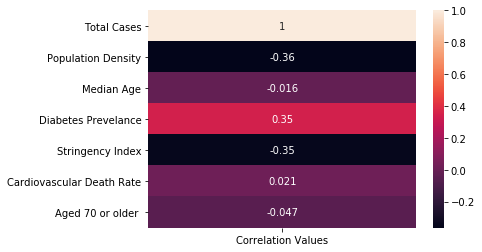

In [39]:
heatmap_df=pd.DataFrame({'Correlation Values':df_corr.corr()['Total Cases'].values},index=df_corr.corr()['Total Cases'].index)
sns.heatmap(heatmap_df,annot=True)
plt.show()


Hence,we see that most attributes have negative correlations with the total number of cases while one attribute has a positive correlation.The total number of cases obviously has direct correlation value of 1 itself.However,none of the correlation values are high correlation values which are usually greater than 0.6 or less than -0.6 .Perhaps,this goes to show how devastatingly widespread the effects of this  disease 